In [1]:
from b_tools.preprocess import get_standardized_measures

In [2]:
DATASET='50'

In [3]:
seq = get_standardized_measures(f'results/sequential_{DATASET}.csv')
seq_time_tot = seq['TOTAL'].mean()

In [4]:
seq_time_tot

20026380393.5

In [5]:
thr = get_standardized_measures(f'results/thr_{DATASET}.csv', excluded_columns=['P_DEGREE'])

In [6]:
thr

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,34351829,791352171,163045,4728437667,14581225735,56556597,20192087044
1,1,38089609,795183231,161653,4803628676,14753098630,64166541,20454328340
2,2,38485541,403458136,159469,2439086963,7249129803,73269470,10203589382
3,2,33888601,391525658,159880,2386094358,7119773195,60777484,9992219176
4,3,38274837,268056748,169928,1837052966,4768808283,70089635,6982452397
...,...,...,...,...,...,...,...,...
75,38,38467910,30275516,176992,683084743,537825824,46276636,1336107621
76,39,37718687,29784296,161742,689141499,524469668,53590595,1334866487
77,39,34376587,30180267,158717,579006686,498003848,50491630,1192217735
78,40,35945506,29412599,162194,576353658,509429820,47419516,1198723293


In [7]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

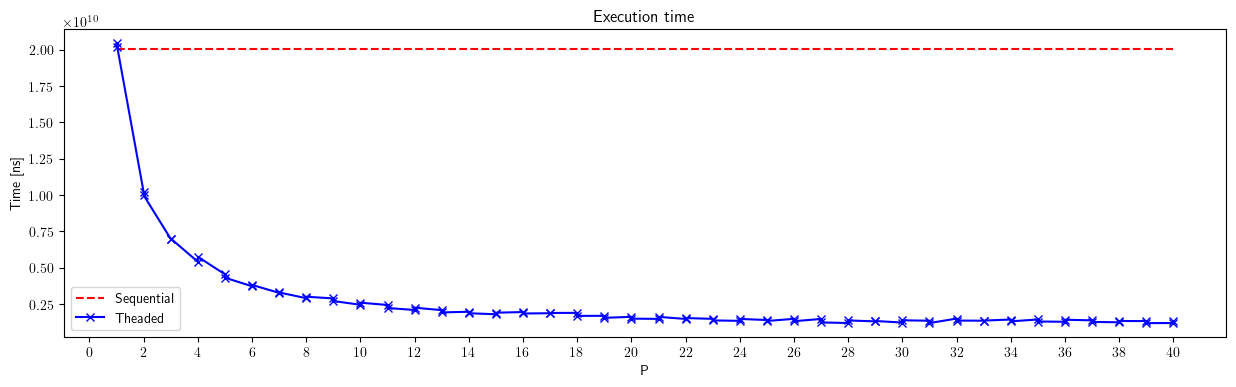

In [8]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(thr['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
# sequential
plt.plot(thr['P_DEGREE'], [seq_time_tot for _ in range(len(thr['P_DEGREE']))], '--r')
# parallel
plt.plot(thr['P_DEGREE'], thr['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [9]:
import pandas as pd

In [10]:
# compute the mean for each group
sp_data = thr.groupby('P_DEGREE', as_index=False).median()

In [11]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL
0,1,36220719.0,793267701.0,162349.0,4.766033e+09,1.466716e+10,60361569.0,2.032321e+10
1,2,36187071.0,397491897.0,159674.5,2.412591e+09,7.184451e+09,67023477.0,1.009790e+10
2,3,36055730.5,267282498.0,167388.5,1.856188e+09,4.772577e+09,65370716.5,6.997642e+09
3,4,37508567.0,199681691.0,167253.5,1.480209e+09,3.799734e+09,67145040.0,5.584445e+09
4,5,35943205.0,159835050.5,170134.0,1.255031e+09,2.920402e+09,62275700.5,4.433656e+09
5,6,37798565.0,133282559.0,164458.0,1.067316e+09,2.478452e+09,56961131.0,3.773974e+09
6,7,37246286.5,111436101.0,166718.0,9.596815e+08,2.116796e+09,61530654.5,3.286857e+09
7,8,38075549.5,96906713.5,162594.5,8.954238e+08,1.867327e+09,59551673.0,2.957448e+09
8,9,37429554.5,88204284.0,167499.0,9.770171e+08,1.634957e+09,64359307.5,2.802134e+09
9,10,37542470.5,79139235.5,167799.0,8.423800e+08,1.504726e+09,61638818.0,2.525594e+09


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [12]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [13]:
sp_data

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,S_p
0,1,36220719.0,793267701.0,162349.0,4.766033e+09,1.466716e+10,60361569.0,2.032321e+10,0.985395
1,2,36187071.0,397491897.0,159674.5,2.412591e+09,7.184451e+09,67023477.0,1.009790e+10,1.983221
2,3,36055730.5,267282498.0,167388.5,1.856188e+09,4.772577e+09,65370716.5,6.997642e+09,2.861875
3,4,37508567.0,199681691.0,167253.5,1.480209e+09,3.799734e+09,67145040.0,5.584445e+09,3.586100
4,5,35943205.0,159835050.5,170134.0,1.255031e+09,2.920402e+09,62275700.5,4.433656e+09,4.516900
5,6,37798565.0,133282559.0,164458.0,1.067316e+09,2.478452e+09,56961131.0,3.773974e+09,5.306443
6,7,37246286.5,111436101.0,166718.0,9.596815e+08,2.116796e+09,61530654.5,3.286857e+09,6.092866
7,8,38075549.5,96906713.5,162594.5,8.954238e+08,1.867327e+09,59551673.0,2.957448e+09,6.771508
8,9,37429554.5,88204284.0,167499.0,9.770171e+08,1.634957e+09,64359307.5,2.802134e+09,7.146831
9,10,37542470.5,79139235.5,167799.0,8.423800e+08,1.504726e+09,61638818.0,2.525594e+09,7.929374


In [14]:
max_speedup = sp_data[sp_data['S_p'].max() == sp_data['S_p']]

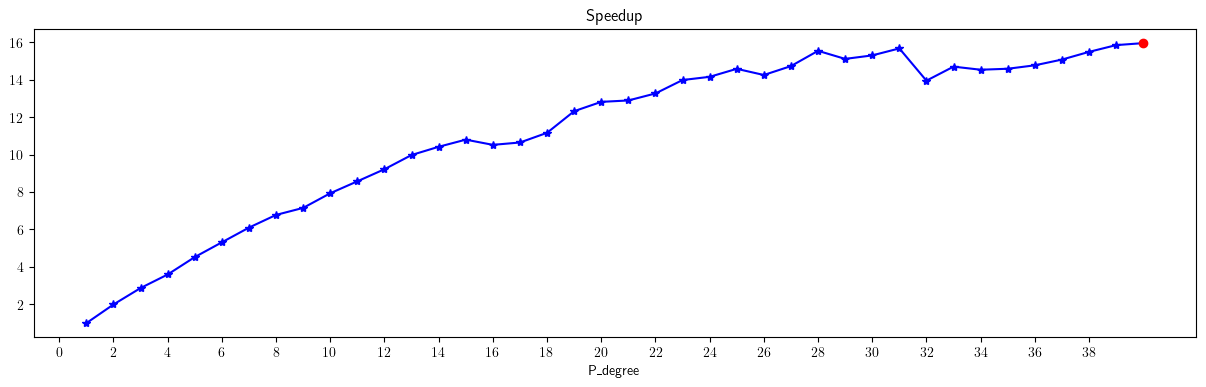

In [15]:
# plot results
plt.figure(figsize=(15,4))
plt.title("Speedup")
plt.xlabel('P_{degree}')
plt.xticks(range(0, len(sp_data), 2))
plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], '*-b')
plt.plot(max_speedup['P_DEGREE'],max_speedup['S_p'], 'or')

### Max Speedup

Max speedup reached

In [16]:
max_speedup

,P_DEGREE,READ,FREQCALC,HUFFBUILD,MAP,TRANSFORM,WRITE,TOTAL,S_p
39,40,38655506.5,29401243.0,162720.0,622742053.5,514168465.0,49958717.0,1.255089e+09,15.956147


# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [17]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    2.032321e+10
Name: TOTAL, dtype: float64

In [18]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


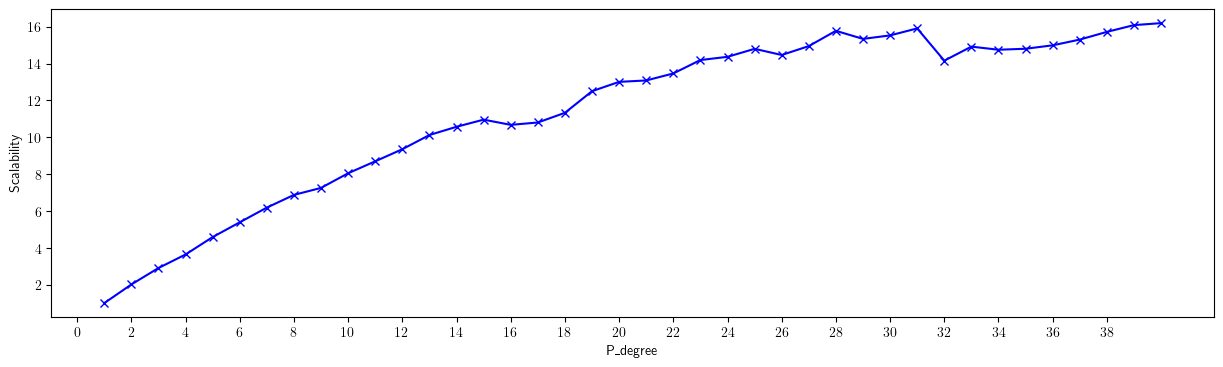

In [19]:
# plot results
plt.figure(figsize=(15,4))
plt.xticks(range(0, len(sp_data), 2))
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')

In [20]:
seq_time_tot/190740907

104.9925823908345